## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

'head' nâ€™est pas reconnu en tant que commande interne
ou externe, un programme exÃ©cutable ou un fichier de commandes.


In [4]:
import pandas as pd
import numpy
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.pkl"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [5]:
happy = pd.read_csv("Data/happiness2020.csv", sep=',')
happy.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [40]:
country = pd.read_csv("Data/countries_info.csv", decimal=',') 
# very important to add the indicator to decimal : ',', hence recognises 
country.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [45]:
happy['country_name'] = happy['country'].apply(lambda r: r.lower())
country_features = happy.merge(country)
country_features.drop('country_name', axis=1) # if horizontal axis not specified, takes vertical per default

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6
...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,93.4
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,90.3
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,50.2
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,80.6


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [8]:
country_features.sort_values(ascending=[False], by=['happiness_score']).head(10)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy
38,Finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,finland,338145,5231372,"100,0"
31,Denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,denmark,43094,5450661,"100,0"
115,Switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,switzerland,41290,7523934,"99,0"
50,Iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,iceland,103000,299388,"99,9"
92,Norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,norway,323802,4610820,"100,0"
87,Netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe,netherlands,41526,16491461,"99,0"
114,Sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe,sweden,449964,9016596,"99,0"
88,New Zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ,new zealand,268680,4076140,"99,0"
6,Austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,austria,83870,8192880,"98,0"
72,Luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,luxembourg,2586,474413,"100,0"


We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [9]:
average_by_region = country_features.groupby("world_region")['happiness_score'].agg(['mean','count']) 
# the count function named counts the number of points put in each group
average_by_region.sort_values("mean", ascending=False)

,mean,count
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [10]:
country_features[country_features.world_region == "North America and ANZ"][['country', 'happiness_score']]

,country,happiness_score
5,Australia,7.2228
21,Canada,7.2321
88,New Zealand,7.2996
127,United States,6.9396


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [11]:
country_features[country_features.literacy=='100,0']['country']

5      Australia
31       Denmark
38       Finland
72    Luxembourg
92        Norway
Name: country, dtype: object

In [48]:
for idx, row in country_features[country_features.literacy==100.0].iterrows():
    print("{} - {} ({})".format(row.world_region, row.country, row.happiness_score))

North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.237500191)
Western Europe - Norway (7.4879999160000015)


What is the global average?

In [47]:
country_features.literacy.mean()

81.85112781954886

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [54]:
i = 0
for idx, row in country_features[country_features.literacy<50.0].iterrows():
    i = i + 1/len(country_features)
print("Percentage of countries with literacy level < 50%: {:.2%}".format(i))

Percentage of countries with literacy level < 50%: 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [71]:
illiterate = country_features.population*(1-country_features.literacy/100)
illiterate.tot = illiterate.sum()
illiterate.percent = illiterate.tot/country_features.population.sum()
print("Raw number of illiterate people worldwide : {:.4} and in percentage : {:.2%}".format(illiterate.tot, illiterate.percent))

Raw number of illiterate people worldwide : 1.249e+09 and in percentage : 20.33%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [73]:
country_features["population_density"] = country_features.population/country_features.area
country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,country_name,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,afghanistan,647500,31056997,36.0,47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,albania,28748,3581655,86.5,124.587971
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,algeria,2381740,32930091,70.0,13.826065
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,argentina,2766890,39921833,97.1,14.428413
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,armenia,29800,2976372,98.6,99.878255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,venezuela,912050,25730435,93.4,28.211650
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,vietnam,329560,84402966,90.3,256.108041
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,yemen,527970,21456188,50.2,40.639029
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,zambia,752614,11502010,80.6,15.282748


What is the happiness score of the 3 countries with lowest population density?

In [77]:
country_features.sort_values(ascending=True, by=['population_density'])[['country', 'happiness_score']].head(3)

,country,happiness_score
83,Mongolia,5.4562
5,Australia,7.2228
14,Botswana,3.4789


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healthy life expectancy (y).

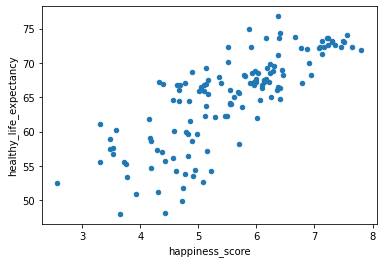

In [78]:
country_features.plot.scatter('happiness_score', 'healthy_life_expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.